<a href="https://colab.research.google.com/github/RafalDoroz/mun/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importujemy potrzebne biblioteki
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Wczytujemy dane - w tym przypadku zestaw Iris
iris = load_iris()
X = iris.data  # dane wejściowe
y = iris.target  # etykiety (klasy)




In [ ]:
# Tworzymy DataFrame z danymi Iris
iris_df = pd.DataFrame(data=X, columns=iris.feature_names)
iris_df['target'] = y

# Wyświetlamy pierwsze 5 wierszy zbioru danych
print("Zbiór danych Iris:")
print(iris_df.head())


Zbiór danych Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [ ]:
# Podzielmy dane na zbiór treningowy i testowy (70% - trening, 30% - test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# Inicjalizujemy klasyfikator K-Nearest Neighbors (KNN) z domyślną liczbą sąsiadów (k=5)
knn = KNeighborsClassifier()
#knn = KNeighborsClassifier(n_neighbors=3)


In [ ]:
# Trenujemy model na danych treningowych
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [ ]:
# Klasyfikacja jednej próbki

# Wybieramy losową próbkę ze zbioru testowego
sample_index = 3
sample = X_test[sample_index].reshape(1, -1)  # Dopasowanie wymiarów próbki
#sample = [[5.1, 3.5, 1.4, 0.2]]

# Dokonujemy predykcji dla wybranej próbki
predicted_class = knn.predict(sample)
actual_class = y_test[sample_index]

# Wyświetlamy wyniki klasyfikacji jednej próbki
print(f'Próbka: {sample}')
print(f'Rzeczywista klasa: {iris.target_names[actual_class]}')
print(f'Przewidywana klasa: {iris.target_names[predicted_class[0]]}')

Próbka: [[6.  2.9 4.5 1.5]]
Rzeczywista klasa: versicolor
Przewidywana klasa: versicolor


In [ ]:
# Dokonujemy predykcji na danych testowych
y_pred = knn.predict(X_test)


In [ ]:
# Wyświetlamy dokładność modelu
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Dokładność modelu: {accuracy}')



Dokładność modelu: 1.0


In [ ]:
# Wyświetlamy macierz pomyłek
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f"Macierz pomyłek:\n{conf_matrix}")

Macierz pomyłek:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


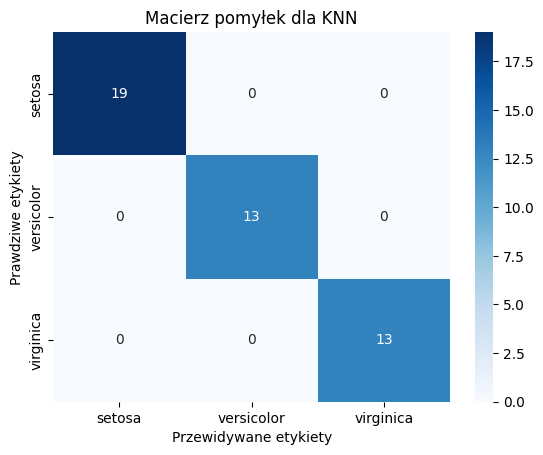

In [ ]:
# Wizualizacja macierzy pomyłek
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Przewidywane etykiety')
plt.ylabel('Prawdziwe etykiety')
plt.title('Macierz pomyłek dla KNN')
plt.show()